# LE PRE-TRAITEMENT (PRE-PROCESSING) 

Le pre-processing est la préparation (nettoyage, filtrage, normalisation, ...) des données avant leur utilisation pour l'entrainement d'un modèle.

### Le 'transformer'

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# LabelEncoder est seulement adapté aux tableaux à une dimension

In [10]:
Y = np.array(['Chat', 'Chien', 'Oiseau', 'Chien', 'Chat'])

In [11]:
transformer = LabelEncoder()
transformer.fit(Y)

LabelEncoder()

In [12]:
transformer.transform(Y)

array([0, 1, 2, 1, 0])

In [14]:
transformer.fit_transform(Y)

array([0, 1, 2, 1, 0], dtype=int64)

Une pipeline est une chaine de transformation combinant un transformer et un estimateur obtenus à partir de train set

### L'encodage : les transformer du pre-processing

La méthode 'inverse_transform' permet de décodr des données encodées

In [9]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [10]:
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [11]:
encoder.transform(y)

array([0, 1, 0, 2])

In [12]:
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [13]:
encoder.classes_

array(['chat', 'chien', 'oiseau'], dtype='<U6')

In [15]:
encoder.inverse_transform(np.array([1, 0, 2, 1, 0]))

array(['chien', 'chat', 'oiseau', 'chien', 'chat'], dtype='<U6')

Pour encoder des données d'un tableau de dimension 2, on utilise 'OrdinalEncoder'

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
x = np.array([['chat', 'mammifère'],
            ['chien', 'carnivore'],
            ['chat', 'mammifère'],
            ['aigle', 'oiseau'],
            ['vautour', 'oiseau']])

In [19]:
o_encoder = OrdinalEncoder()
o_encoder.fit_transform(x)

array([[1., 1.],
       [2., 0.],
       [1., 1.],
       [0., 2.],
       [3., 2.]])

In [2]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [22]:
b_encoder = LabelBinarizer()
b_encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [24]:
b_encoder = LabelBinarizer(sparse_output=True)
print(b_encoder.fit_transform(y))
# Des tableaux à une dimension sont créés pour contenir les valeurs non nulles de la matrice 
# d'encodage, ainsi que leurs positions dans cette matrice

  (0, 0)	1
  (1, 1)	1
  (2, 0)	1
  (3, 2)	1


In [27]:
oh_encoder = OneHotEncoder()
oh_encoder.fit_transform(x)

<5x7 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [28]:
print(oh_encoder.fit_transform(x))

  (0, 1)	1.0
  (0, 5)	1.0
  (1, 2)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (2, 5)	1.0
  (3, 0)	1.0
  (3, 6)	1.0
  (4, 3)	1.0
  (4, 6)	1.0


### La normalisation

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,  RobustScaler

In [17]:
x = np.array([[80], [100], [70], [145]])

In [39]:
MMS = MinMaxScaler()
MMS.fit_transform(x)

array([[0.13333333],
       [0.4       ],
       [0.        ],
       [1.        ]])

In [41]:
# Pour remettre une prédiction à son échelle initiale, on utilise inverse_transform
MMS.inverse_transform(np.array([[0.5], [0.9]]))

array([[107.5],
       [137.5]])

In [44]:
StandardScaler().fit_transform(x)

array([[-0.65094455],
       [ 0.0433963 ],
       [-0.99811498],
       [ 1.60566324]])

In [46]:
RobustScaler().fit_transform(x)

array([[-0.2962963 ],
       [ 0.2962963 ],
       [-0.59259259],
       [ 1.62962963]])

In [18]:
x

array([[ 80],
       [100],
       [ 70],
       [145]])

### Polynomial features

In [4]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

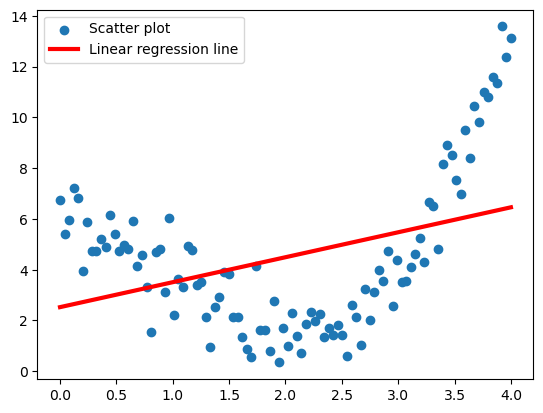

In [54]:
np.random.seed(0)
x = np.linspace(0, 4, 100).reshape((100, 1))
y = x**2 + 5*np.cos(x) + np.random.randn(100, 1)

plt.scatter(x, y, label = 'Scatter plot')

model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

plt.plot(x, y_pred, c = 'r', lw = 3, label = 'Linear regression line')

plt.legend()

plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

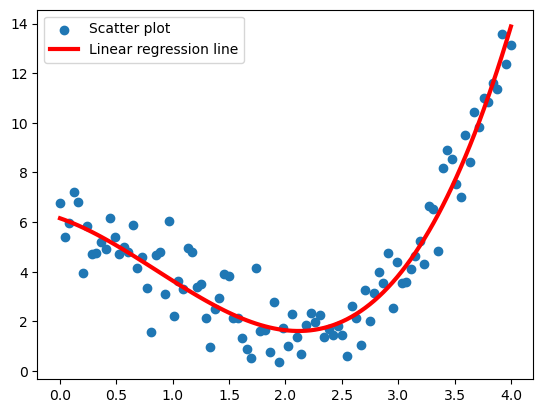

In [56]:
x_pol = PolynomialFeatures(3).fit_transform(x) # un polynôme de dégré 3 construit sur x

plt.scatter(x, y, label = 'Scatter plot')
model = LinearRegression().fit(x_pol, y)
y_pred = model.predict(x_pol)
plt.plot(x, y_pred, c = 'r', lw = 3, label = 'Linear regression line')

plt.legend()

plt.show()

### Les transformer non linéaires

In [6]:
from sklearn.preprocessing import PowerTransformer

In [61]:
np.random.seed(0)
x = np.random.rand(100, 2) + np.random.randn(100, 2)
x_PT = PowerTransformer().fit_transform(x)

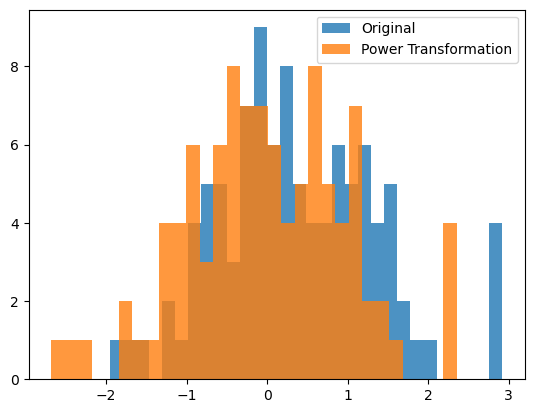

In [65]:
plt.hist(x[:,0], bins = 30, alpha = 0.8, label = 'Original')
plt.hist(x_PT[:,0], bins = 30, alpha = 0.8, label = 'Power Transformation')
plt.legend()
plt.show()

### Discrétisation de variables continues

In [57]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [67]:
x = np.linspace(0, 5, 10).reshape(10, 1)
x

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [69]:
np.hstack((x, Binarizer(threshold = 3).fit_transform(x)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [73]:
KB = KBinsDiscretizer(n_bins = 6).fit_transform(x)

In [75]:
KB.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

### Les 'pipeline's

Application

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris

In [103]:
iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.2 )

Performance du modèle sans pre-processing

In [104]:
model = SGDClassifier(random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9

Performance du modèle avec pre-processing

In [88]:
# Transformer

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)

# Estimator

model = SGDClassifier(random_state=0)
model.fit(x_train_normalized, y_train)

# Test
x_test_normalized = scaler.fit_transform(x_test)
model.predict(x_test_normalized)

array([0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       2, 2, 1, 0, 2, 1, 2, 1])

On peut combiner transform et estimator en une seule méthode appelée pipeline

In [8]:
from sklearn.pipeline import make_pipeline

In [93]:
model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(x_train, y_train)
model.predict(x_test)

array([0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 1, 0, 1, 1, 2, 1])

In [9]:
from sklearn.model_selection import GridSearchCV

In [95]:
model = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [101]:
params = {
    'polynomialfeatures__degree': [2,3,4],
    'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [102]:
grid.score(x_test, y_test)

0.9666666666666667

### Développement de pipelines avancées avec sklearn

In [19]:
import seaborn as sns

In [21]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
y = titanic['survived']
x = titanic.drop('survived', axis = 1)

In [24]:
from sklearn.compose import make_column_transformer

In [25]:
transformer = make_column_transformer((StandardScaler(),
                                      ['age', 'fare']))

In [26]:
transformer.fit_transform(x) # Seules les colonnes age et fare seront utilisées pour l'entrainement

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

In [28]:
#model = make_pipeline(transformer, SGDClassifier())
#model.fit(x, y)

Application classique

In [30]:
# Séparation des variables entre variables catégorielles et variables numériques
numerical_features = ['pclass', 'age', 'fare']
categorical_features = ['sex', 'deck', 'alone']

In [39]:
# Columntransformer est utilisée ensuite pour traiter séparément chaque liste de variables

In [40]:
from sklearn.impute import SimpleImputer

In [42]:
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())
# SimpleImputer suprime ou remplace les valeurs manquantes

In [45]:
# Rassemblage de ces deux pipelines
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                        (categorical_pipeline, categorical_features))
print(preprocessor)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['pclass', 'age', 'fare']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['sex', 'deck', 'alone'])])


In [46]:
# pipeline final

model = make_pipeline(preprocessor, SGDClassifier())
model.fit(x, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  

In [48]:
from sklearn.compose import make_column_selector

In [49]:
# Séparation de toutes les variables de titanic entre variables catégorielles et variables numériques
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

In [50]:
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

In [51]:
# Rassemblage de ces deux pipelines

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                        (categorical_pipeline, categorical_features))
print(preprocessor)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000117B08ACCD0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000117B092EDC0>)])


In [52]:
# pipeline final

model = make_pipeline(preprocessor, SGDClassifier())
model.fit(x, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000117B08ACCD0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEn

Pipelines parallèles

In [54]:
from sklearn.pipeline import make_union

In [65]:
numeric_features = titanic[['age', 'fare']]
numeric_features = numeric_features.dropna(axis = 0)

In [66]:
pipeline = make_union(StandardScaler(), Binarizer())

In [67]:
pipeline.fit_transform(numeric_features)

array([[-0.53037664, -0.51897787,  1.        ,  1.        ],
       [ 0.57183099,  0.69189675,  1.        ,  1.        ],
       [-0.25482473, -0.50621356,  1.        ,  1.        ],
       ...,
       [-0.73704057, -0.08877362,  1.        ,  1.        ],
       [-0.25482473, -0.08877362,  1.        ,  1.        ],
       [ 0.15850313, -0.50952283,  1.        ,  1.        ]])

In [68]:
pipeline.fit_transform(numeric_features).shape

(714, 4)

### Les fonctions du module sklearn.impute

In [70]:
import pandas as pd

#### SimpleImputer

In [85]:
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator

In [78]:
x_train = np.array([[np.nan, 5], [7, 25], [24, np.nan], [50, np.nan]])
x_train

array([[nan,  5.],
       [ 7., 25.],
       [24., nan],
       [50., nan]])

In [79]:
SImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
SImputer.fit_transform(x_train)

array([[27.,  5.],
       [ 7., 25.],
       [24., 15.],
       [50., 15.]])

In [77]:
x_test = np.array([[4, 8], [np.nan, 6], [19, np.nan]])

In [80]:
# Transformation du testset avec le transformer appliqué au train set
SImputer.fit_transform(x_test)

array([[ 4. ,  8. ],
       [11.5,  6. ],
       [19. ,  7. ]])

#### KNNImputer

In [82]:
KNN_imputer = KNNImputer(n_neighbors=1)
KNN_imputer.fit_transform(x_train)

array([[ 7.,  5.],
       [ 7., 25.],
       [24., 25.],
       [50., 25.]])

In [83]:
KNN_imputer.fit_transform(x_test)

array([[ 4.,  8.],
       [ 4.,  6.],
       [19.,  8.]])

#### MissingIndicator

In [86]:
MImputer = MissingIndicator()
MImputer.fit_transform(x_train)

array([[ True, False],
       [False, False],
       [False,  True],
       [False,  True]])

Application: Il est utilisé avec make_union + OneHotEncoder

In [87]:
pipeline = make_union(SimpleImputer(strategy='constant', fill_value=-99),
                     MissingIndicator())
# Traitement des données avec cette pipeline
pipeline.fit_transform(x_train)

array([[-99.,   5.,   1.,   0.],
       [  7.,  25.,   0.,   0.],
       [ 24., -99.,   0.,   1.],
       [ 50., -99.,   0.,   1.]])

#### Application sur les données du titanic

In [90]:
x = titanic[['pclass', 'age']]
y = titanic['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [91]:
model = make_pipeline(KNNImputer(), SGDClassifier())

In [92]:
model

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('sgdclassifier', SGDClassifier())])

In [93]:
# Dictionnaire des paramètres
params = {'knnimputer__n_neighbors': [1, 2, 3, 4] }

In [94]:
grid = GridSearchCV(model, param_grid=params, cv = 5)

In [95]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': [1, 2, 3, 4]})

In [96]:
grid.best_params_

{'knnimputer__n_neighbors': 4}

In [97]:
grid.best_estimator_

Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=4)),
                ('sgdclassifier', SGDClassifier())])

In [98]:
grid.best_score_

0.686841327686398

In [99]:
grid.best_index_

3

### La sélection de variables (features selection) avec sklearn.feature_selection

#### VarianceThreshold

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

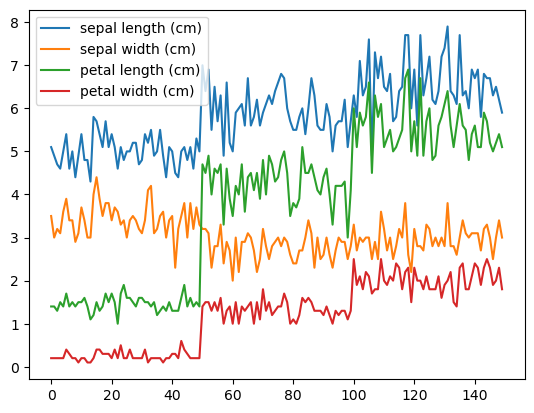

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

plt.plot(x)
plt.legend(iris.feature_names)

In [3]:
from sklearn.feature_selection import VarianceThreshold

In [5]:
x.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [7]:
selectorVT = VarianceThreshold(threshold = 0.2)
selectorVT.fit_transform(x) # La variables sepal width a été sélectionnée

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [8]:
# Les variables sélectionnées :
selectorVT.get_support()

array([ True, False,  True,  True])

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
# Boolean indexng pour retourner les variables sélectionnées

np.array(iris.feature_names)[selectorVT.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

#### sklearn.feature_selection.SelectKBest

SelectKBest sélectionne les K variables dont les scores des tests de dépendance avec y sont les plus élevés

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
# Test de dépendance ch2
score_test_chi2, p_values = chi2(x, y)

In [16]:
# Plus les scores du test de chi2 sont élevés, plus la dépendance entre les variables de x concernées et y est grande
print(score_test_chi2)

[ 10.81782088   3.7107283  116.31261309  67.0483602 ]


In [18]:
selectorKB = SelectKBest(chi2, k=2)
selectorKB.fit_transform(x, y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [19]:
selectorKB.get_support()

array([False, False,  True,  True])

In [21]:
np.array(iris.feature_names)[selectorKB.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

#### SelectFromModel du module sklearn.feautre_selection

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [24]:
selectorSFM = SelectFromModel(SGDClassifier(random_state=0), threshold = 'mean')
selectorSFM.fit_transform(x, y)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [25]:
np.array(iris.feature_names)[selectorSFM.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [26]:
selectorSFM.estimator_

SGDClassifier(random_state=0)

In [28]:
selectorSFM.estimator_.coef_
# Les lignes désignent les coefficients pour chaque classe de y et les colonnes désignent les coefs pour chaque variable.

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [29]:
selectorSFM.estimator_.coef_.mean(axis = 0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [30]:
selectorSFM.estimator_.coef_.mean(axis = 0).mean()

-0.9721175565229512

#### RFE + RFECV de sklearn.feature_selection

Ce sont des sélecteurs récursifs

In [31]:
from sklearn.feature_selection import RFE, RFECV

In [32]:
selectorRFECV = RFECV(SGDClassifier(), step=1, min_features_to_select=2, cv = 5)
# step désigne le nombre de varaible à éliminer à chaque itération
# min_features_to_select désigne le nombre minimal de variable que l'on désire conserver

In [33]:
selectorRFECV.fit(x, y)

RFECV(cv=5, estimator=SGDClassifier(), min_features_to_select=2)

In [34]:
# Rang des variables selon leur importance
selectorRFECV.ranking_

array([2, 1, 1, 1])

In [35]:
# Score par itération
selectorRFECV.grid_scores_

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.5       , 0.96666667, 0.7       , 0.93333333, 0.73333333],
       [1.        , 0.8       , 0.9       , 0.8       , 0.93333333],
       [0.8       , 1.        , 0.86666667, 0.7       , 0.9       ]])